 Codi creat per Laia Casamiquela Juliol 2021 
 
 Exemple d'estimació de la distancia i edat d'un cúmul obert utilitzant fotometria B,V de Johnson
 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

params = {#'backend': 'pdf',
         'axes.linewidth': 0.5,
         'axes.labelsize': 17,
         'font.size': 17,
         'legend.fontsize': 17,
         'xtick.labelsize': 17,
         'ytick.labelsize':17,
         #'text.usetex': True
}
plt.rcParams.update(params)


from_maximdl = False
lab = ['$\mathrm{O}5$','$\mathrm{B}5$','$\mathrm{A}5$','$\mathrm{F}0$','$\mathrm{F}5$',\
       '$\mathrm{G}5$','$\mathrm{K}0$','$\mathrm{K}5$','$\mathrm{M}0$','$\mathrm{M}5$']
Xpos = [-0.4,-0.2,0.1,0.25,0.4,0.65,0.85,1.15,1.4,1.6]

# 1. Llegim les dades

## 1.1 Exemple: les pleiades

Com a exemple carreguem la fotometria de les Pleiades obtingudes per Bouy et al. 2015 (https://arxiv.org/abs/1502.03728).
Per a un altre cas caldrà carregar les dades experimentals de cúmul en qüestió: magnituds B i V de les estrelles individuals


In [2]:
cols = ['DANCe','RAdeg','DEdeg','pmRA','pmDE','e_pmRA','e_pmDE','BTmag','e_BTmag','VTmag','e_VTmag','rmag',\
        'e_rmag','gmag','e_gmag','imag','e_imag','Jmag','e_Jmag','Hmag','e_Hmag','Kmag','e_Kmag','Qflg',\
        'W1','e_W1','W2','e_W2','W3','e_W3','W4','e_W4','Pmb','Teff','e_Teff','Lbol','e_Lbol']
f = pd.read_csv('dancept.dat',delim_whitespace=True,names=cols)
# ara agafem nomes les estrelles més brillants i nomes les columnes que ens interessen
pleiades = f.query('(Pmb>0.85) & (VTmag<11)')
pleiades = pleiades[['RAdeg','DEdeg','BTmag','VTmag']]

## 1.2 Models d'isocrones

Llegim l'arxiu amb les isocrones de PARSEC versio 1.2S (arxiu descarregat amb 5 models d'edats diferents)
Aqui ens podem descarregar més isocrones http://stev.oapd.inaf.it/cgi-bin/cmd

In [3]:
iso = pd.read_csv('isocrones_mod.csv')

Text(0, 0.5, '$V$')

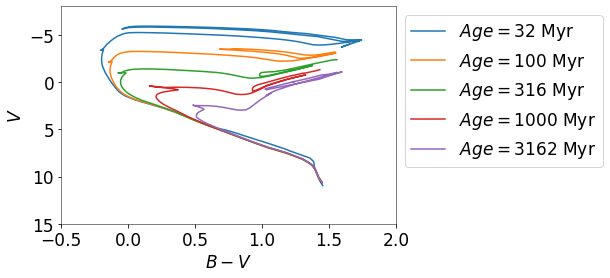

In [14]:
#plot dels models
for age in iso.logAge.unique():
    plt.plot(iso.query('logAge == @age').Bmag-iso.query('logAge == @age').Vmag,\
             iso.query('logAge == @age').Vmag,label=f'$Age={10**(age-6):.0f}$ Myr',zorder=0)
plt.ylim(15,-8)
plt.xlim(-0.5,2)
plt.legend(bbox_to_anchor=(1., 1.), loc="upper left",ncol=1, fancybox=True)
plt.xlabel('$B-V$')
plt.ylabel('$V$')


## 1.3 Juguem amb l'absorció i la distancia per trobar el millor model

In [11]:
df = pleiades
magV = 'VTmag'
magB = 'BTmag'

In [18]:
av = 0.12
d = 130

Text(0, 0.5, '$V$')

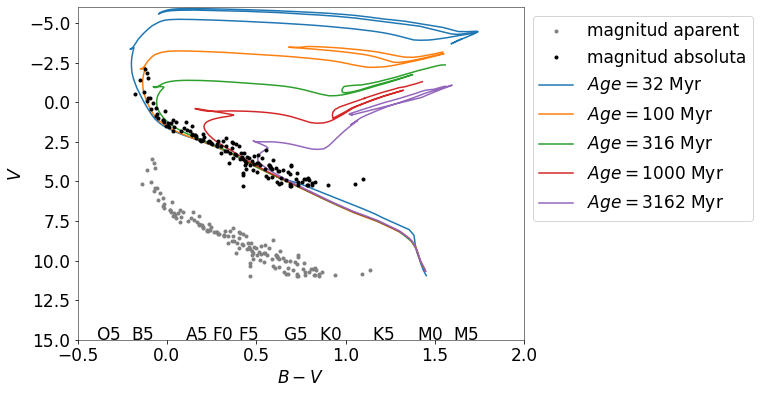

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
fig.subplots_adjust(hspace = 0.18, wspace=0.15,left=0.08,right=0.7,top=0.9,bottom=0.13)

#plot de les magnituds i colors aparents
ax.plot(df[magB]-df[magV],df[magV],marker='o',\
        color='gray',linestyle='None',ms=3,label='magnitud aparent')

#plot de les magnituds corregides pel modul de distancia, i els colors corregits d'extinció
DM = 5.*np.log10(d/10.)+av
EBV = av/3.1
ax.plot(df[magB]-df[magV]-EBV,df[magV]-DM,marker='o',\
        color='k',linestyle='None',ms=3,label='magnitud absoluta')

#plot dels models
for age in iso.logAge.unique():
    ax.plot(iso.query('logAge == @age').Bmag-iso.query('logAge == @age').Vmag,\
             iso.query('logAge == @age').Vmag,label=f'$Age={10**(age-6):.0f}$ Myr',zorder=0)
for l,x in zip(lab,Xpos):
    ax.annotate(l,xy=(x,15),xytext=(x,15))
    

ax.set_ylim(15,-6)
ax.set_xlim(-0.5,2)
ax.legend(bbox_to_anchor=(1., 1.), loc="upper left",ncol=1, fancybox=True)
ax.set_xlabel('$B-V$')
ax.set_ylabel('$V$')

#fig.savefig('pleiades_isocrones.pdf')

per aquestes dades de les Pléiades obtenim que el cúmul està a 130 pc i té una edat de logAge=8 (100 Myr)

# 2. Dades d'un cúmul obtingudes amb el maximDL

In [1]:
filenames = [
    'magnituds_NGC6633.csv'
    # podem afegir altres fitxers aquí si cal
]

data_frame_list = []
for filename in filenames:
    from_maximdl = True
    if from_maximdl:
        dades = pd.read_csv(filename,sep=',')

        #Canvio el format que dona el maximdl
        dades = dades.drop(dades.columns[0],axis=1)

        columns = []
        columns.append(dades.columns[0])
        for c in dades.columns[1:]:
            name = c.split(':')[0].strip()
            columns.append(name)

        dades.columns = columns

        # Transposo perque les estrelles quedin per linies
        cumul = dades.T
        cumul.columns = list(dades[dades.columns[0]])
        cumul.columns = cumul.columns.str.strip()
        cumul = cumul[1:]
    else:
        dades = pd.read_csv(filename,sep=',',index_col="Filter",decimal=",")
        cumul = dades.T
        
    data_frame_list.append(cumul)
        
cumul = pd.concat(data_frame_list)

Juguem amb l'extinció interestel·lar i la distancia per tal de fer quadrar les dades corregides amb la seqüència principal dels models d'isocrona


In [2]:
av = 0.2
d = 180

Indiquem el nom de la taula de dades que volem plotejar i els noms de les magnituds

In [3]:
df = cumul
magV = 'Johnson V'
magB = 'Johnson B'


Fem el gràfic per comprovar si la distancia i extinció que hem posat quadren amb les dades

NameError: name 'iso' is not defined

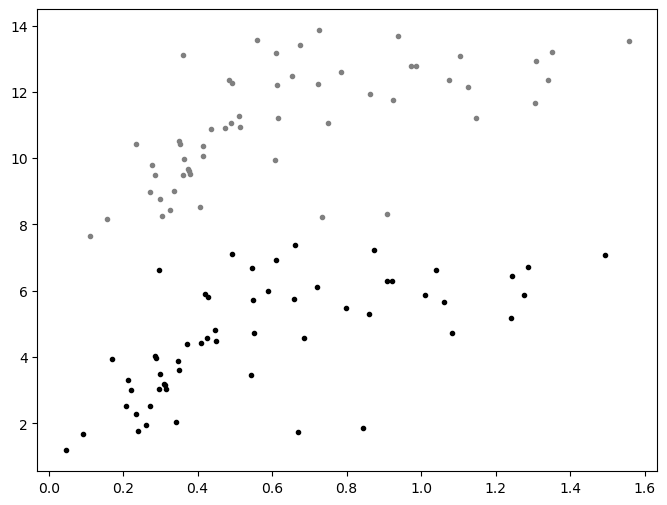

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
fig.subplots_adjust(hspace = 0.18, wspace=0.15,left=0.08,right=0.7,top=0.9,bottom=0.13)

#plot de les magnituds i colors aparents
ax.plot(df[magB]-df[magV],df[magV],marker='o',\
        color='gray',linestyle='None',ms=3,label='magnitud aparent')

#plot de les magnituds corregides pel modul de distancia, i els colors corregits d'extinció
DM = 5.*np.log10(d/10.)+av
EBV = av/3.1
ax.plot(df[magB]-df[magV]-EBV,df[magV]-DM,marker='o',\
        color='k',linestyle='None',ms=3,label='magnitud absoluta')

#plot dels models
for age in iso.logAge.unique():
    ax.plot(iso.query('logAge == @age').Bmag-iso.query('logAge == @age').Vmag,\
             iso.query('logAge == @age').Vmag,label=f'$Age={10**(age-6):.0f}$ Myr',zorder=0)
for l,x in zip(lab,Xpos):
    ax.annotate(l,xy=(x,15),xytext=(x,15))
    

ax.set_ylim(15,-6)
ax.set_xlim(-0.5,2)
ax.legend(bbox_to_anchor=(1., 1.), loc="upper left",ncol=1, fancybox=True)
ax.set_xlabel('$B-V$')
ax.set_ylabel('$V$')

#fig.savefig('pleiades_isocrones.pdf')